# Image classification with Neural Networks

## Machine Learning Project


\
**Group:** Andrea Ierardi, Emanuele Morales, Gregorio Luigi Saporito


## 1. The dataset

## 1.1 Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
import pandas as pd 


from sklearn.datasets import load_files
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

os.chdir('C:\\Users\\gregs\\OneDrive\\Documenti\\GitHub\\Machine-Learning-Project')
os.getcwd()

'C:\\Users\\gregs\\OneDrive\\Documenti\\GitHub\\Machine-Learning-Project'

## 1.2 Data Loading

In [3]:
DATADIR = "dataset/fruits-360/Training"
DATADIR_test = "dataset/fruits-360/Test"

TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
fruits = {}
def load_dataset(dire):
    fruits = {}
    images_as_array = []
    labels =[]
    for category in tqdm(os.listdir(dire)):
        for typ in TYPES:
            if(category.split()[0] == typ):
               # print(category, typ)
                fruits[category]= typ
                path = os.path.join(dire,category)
                class_num =TYPES.index(fruits[category])

                class_name = fruits[category]
                for img in tqdm(os.listdir(path)):
                   # print("OK: ",os.path.join(path,img) )
                    file = os.path.join(path,img)
                    #print(file, " -- ", dataset)
                    images_as_array.append(img_to_array(load_img(file,target_size=(32, 32))))
                    labels.append(class_num)
    images_as_array =  np.array(images_as_array)
    labels = np.array(labels)
    return images_as_array, labels




### Split in test and training sets

In [4]:
train = load_dataset(DATADIR)
test = load_dataset(DATADIR_test)


 31%|████████████████████████▏                                                      | 147/480 [00:00<00:01, 176.92it/s]


 64%|██████████████████████████████████████████████████▍                            | 307/481 [00:01<00:01, 168.78it/s]


 92%|████████████████████████████████████████████████████████████████████████▊      | 420/456 [00:02<00:00, 161.31it/s]


  5%|███▋                                                                            | 20/429 [00:00<00:02, 191.05it/s]


 34%|██████████████████████████▊                                                    | 167/492 [00:01<00:01, 164.25it/s]


 22%|█████████████████▍                                                             | 108/490 [00:00<00:02, 175.73it/s]


 63%|█████████████████████████████████████████████████▉                             | 310/490 [00:01<00:01, 174.87it/s]


 58%|█████████████████████████████████████████████▍                                 | 425/738 [00:02<00:01, 169.76it/s]


  3%|██▊                                                                             | 17/492 [00:00<00:02, 163.76it/s]


 22%|█████████████████▏                                                             | 107/492 [00:00<00:02, 169.48it/s]


 87%|████████████████████████████████████████████████████████████████████▍          | 853/984 [00:04<00:00, 166.87it/s]


 93%|█████████████████████████████████████████████████████████████████████████▌     | 456/490 [00:02<00:00, 169.53it/s]


  8%|██████▎                                                                         | 37/471 [00:00<00:02, 183.79it/s]


 16%|████████████▍                                                                  | 116/738 [00:00<00:03, 158.20it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 492/492 [00:03<00:00, 162.88it/s]


  5%|███▊                                                                            | 33/702 [00:00<00:04, 158.98it/s]


 13%|██████████▌                                                                     | 65/490 [00:00<00:02, 160.95it/s]


 70%|████████████████████████████████████████████████████████▋                        | 84/120 [01:58<01:59,  3.32s/it]


 18%|██████████████▎                                                                | 121/666 [00:00<00:03, 165.68it/s]


 86%|███████████████████████████████████████████████████████████████████▊           | 572/666 [00:03<00:00, 176.94it/s]


 15%|███████████▌                                                                   | 132/900 [00:00<00:04, 161.83it/s]


 68%|█████████████████████████████████████████████████████▋                         | 306/450 [00:01<00:00, 163.19it/s]


 85%|████████████████████████████████████████████████████████████████████            | 102/120 [02:31<00:49,  2.76s/it]


 84%|██████████████████████████████████████████████████████████████████▏            | 618/738 [00:03<00:00, 165.58it/s]


 36%|████████████████████████████▍                                                  | 266/738 [00:01<00:02, 163.02it/s]


 20%|████████████████                                                               | 100/492 [00:00<00:02, 159.83it/s]


 61%|███████████████████████████████████████████████▊                               | 278/459 [00:01<00:01, 152.89it/s]


 73%|█████████████████████████████████████████████████████████▍                     | 117/161 [00:00<00:00, 162.87it/s]


 48%|██████████████████████████████████████▌                                         | 80/166 [00:00<00:00, 156.93it/s]


 16%|████████████▊                                                                    | 19/120 [00:16<01:35,  1.06it/s]


  0%|                                                                                          | 0/164 [00:00<?, ?it/s]


 57%|█████████████████████████████████████████████▎                                  | 93/164 [00:00<00:00, 180.63it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 246/246 [00:01<00:00, 144.31it/s]

 69%|██████████████████████████████████████████████████████▎                        | 114/166 [00:00<00:00, 157.95it/s]


 71%|█████████████████████████████████████████████████████████▍                       | 85/120 [00:41<00:39,  1.13s/it]


 12%|█████████▋                                                                      | 37/304 [00:00<00:01, 180.94it/s]


 50%|███████████████████████████████████████▌                                       | 123/246 [00:00<00:00, 167.76it/s]


 28%|██████████████████████                                                          | 35/127 [00:00<00:00, 171.23it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [01:02<00:00,  1.93it/s]


In [5]:
x_train, y_train= train

In [6]:
x_test, y_test = test

### Train and test shape

In [7]:
print('Train shape:')
print('X: ',x_train.shape)
print('y: ',y_train.shape)

print('Test shape')
print('X: ',x_test.shape)
print('y: ',y_test.shape)


Train shape:
X:  (29340, 32, 32, 3)
y:  (29340,)
Test shape
X:  (9817, 32, 32, 3)
y:  (9817,)


## 1.2 Pre-processing 

### Pre-process the labels and the images

In [8]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)


In [9]:
print(y_train[0:10])
print("Number of classes: ",no_of_classes)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Number of classes:  10


### Visualisation of the first 10 images

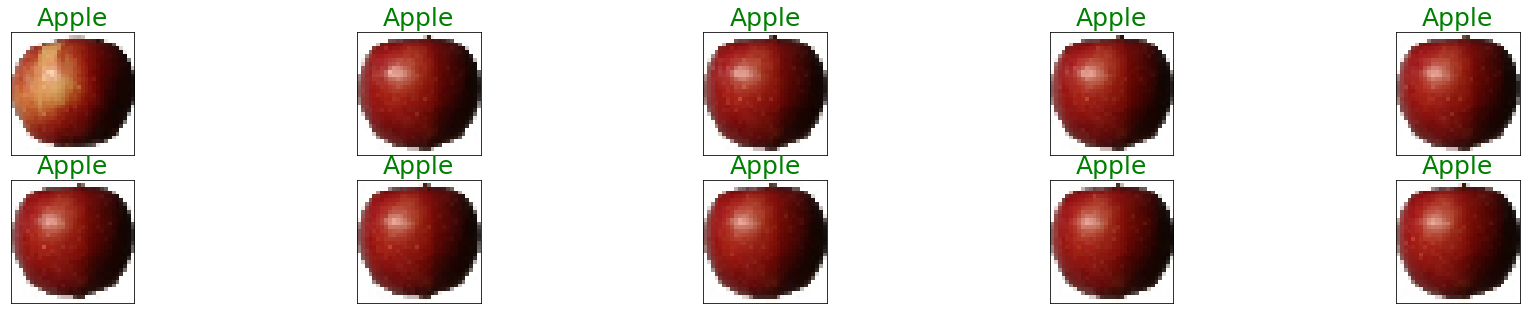

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})

### Suffle of the data

In [11]:
from sklearn.utils import shuffle
import numpy as np
x_train,y_train = shuffle(x_train, y_train)
x_test,y_test = shuffle(x_test, y_test)

### Visualisation of the first 10 images shuffled

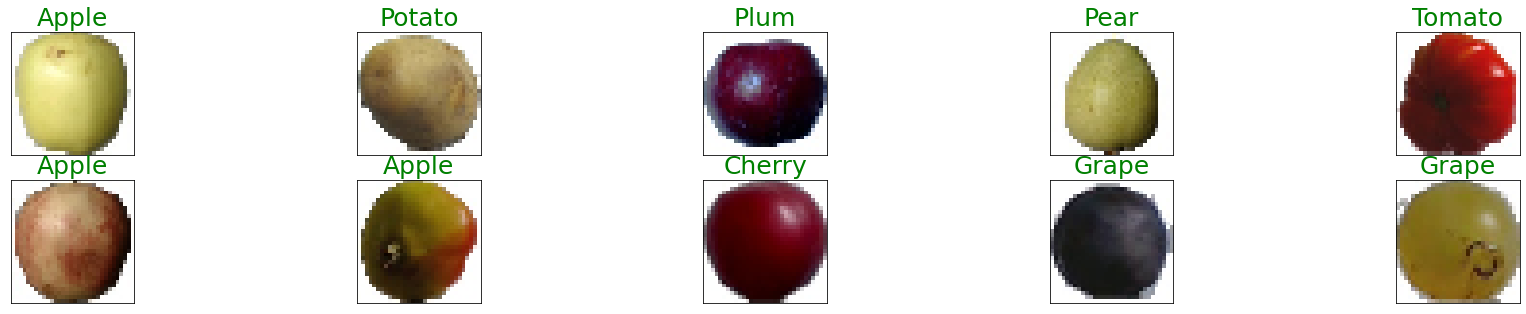

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})

### Split in validation and test set

In [13]:
# Using 80-20 rule
split = len(x_test)*80//100

print('Test len before split: ',len(x_test))
print('Validation split len:', split)

Test len before split:  9817
Validation split len: 7853


In [14]:

# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[split:],x_test[:split]
y_test,y_vaild = y_test[split:],y_test[:split]
print('Train X : ',x_train.shape)
print('Train y :',y_train.shape)

print('1st training image shape ',x_train[0].shape)

print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Train X :  (29340, 32, 32, 3)
Train y : (29340, 10)
1st training image shape  (32, 32, 3)
Vaildation X :  (7853, 32, 32, 3)
Vaildation y : (7853, 10)
Test X :  (1964, 32, 32, 3)
Test y :  (1964, 10)


## PCA and feed-forward NN

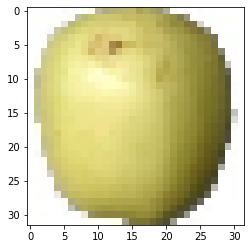

In [15]:
#attempt to plot image
plt.imshow(x_train[0])

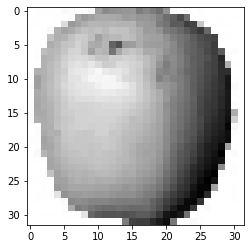

In [18]:
x_train[0].shape
type(x_train[1])
rgb_weights = [0.2989, 0.5870, 0.1140]
image_test = x_train[0]
image_grey = np.dot(image_test[...,:3], rgb_weights)
plt.imshow(image_grey, cmap=plt.get_cmap("gray"))

In [19]:
# transform my np.ndarray from rgb to grey
x_train_grey = np.ndarray(shape=(x_train.shape[0], 32, 32))
for i in range(x_train.shape[0]):
    image_convert = x_train[i]
    x_train_grey[i] = np.dot(image_convert[...,:3], rgb_weights)

x_valid_grey = np.ndarray(shape=(x_valid.shape[0], 32, 32))
for i in range(x_valid.shape[0]):
    image_convert = x_valid[i]
    x_valid_grey[i] = np.dot(image_convert[...,:3], rgb_weights)
    
x_test_grey = np.ndarray(shape=(x_test.shape[0], 32, 32))
for i in range(x_test.shape[0]):
    image_convert = x_test[i]
    x_test_grey[i] = np.dot(image_convert[...,:3], rgb_weights)

In [20]:
# flatten my 32x32 images by concatenating them into a vector, each column of the matrix will be an image
x_train_flat = np.ndarray(shape=(1024, x_train_grey.shape[0]))
for i in range(x_train_grey.shape[0]):
    x_train_flat[:,i] = np.concatenate(x_train_grey[i])
    
x_valid_flat = np.ndarray(shape=(1024, x_valid_grey.shape[0]))
for i in range(x_valid_grey.shape[0]):
    x_valid_flat[:,i] = np.concatenate(x_valid_grey[i])
    
x_test_flat = np.ndarray(shape=(1024, x_test_grey.shape[0]))
for i in range(x_test_grey.shape[0]):
    x_test_flat[:,i] = np.concatenate(x_test_grey[i])

In [21]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
x_train_flat_T = standard_scaler.fit_transform(x_train_flat.T)
x_valid_flat_T = standard_scaler.transform(x_valid_flat.T)
x_test_flat_T = standard_scaler.transform(x_test_flat.T)

In [22]:
x_train_flat_T.shape

(29340, 1024)

In [33]:
x_train_flat = x_train_flat_T.T
x_valid_flat = x_valid_flat_T.T
x_test_flat = x_test_flat_T.T

In [34]:
x_train_flat.shape

(1024, 29340)

In [25]:
a = np.cov(x_train_flat)
b = np.linalg.eig(a)
b[0].shape

(1024,)

In [26]:
b

(array([391.38626916,  86.17965925,  60.06204734, ...,   0.        ,
          0.        ,   0.        ]),
 array([[-2.25977060e-03,  1.95515417e-02, -6.21494562e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.04117344e-04,  4.61703856e-03, -3.58005063e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.90280638e-04,  4.04581747e-03, -2.41951574e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 1.23688550e-03,  2.83306997e-03,  2.36868181e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 8.59033470e-04,  4.02662621e-03,  4.24610409e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]))

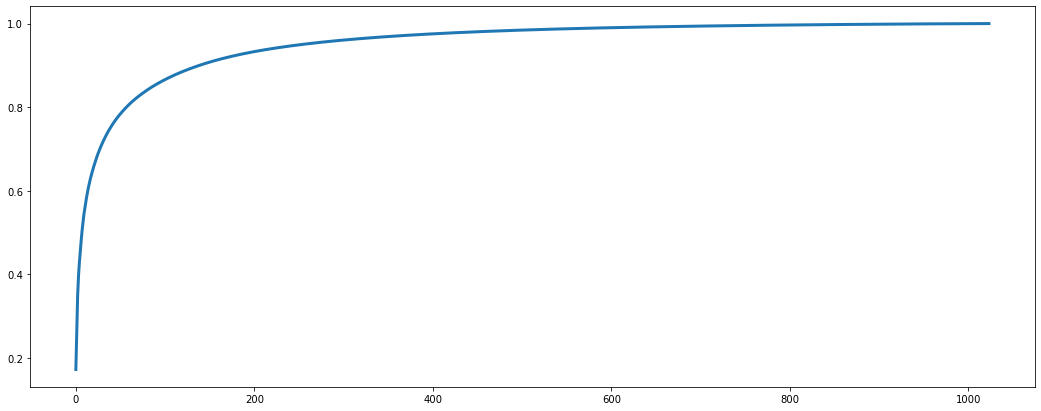

In [27]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_train_flat)
plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

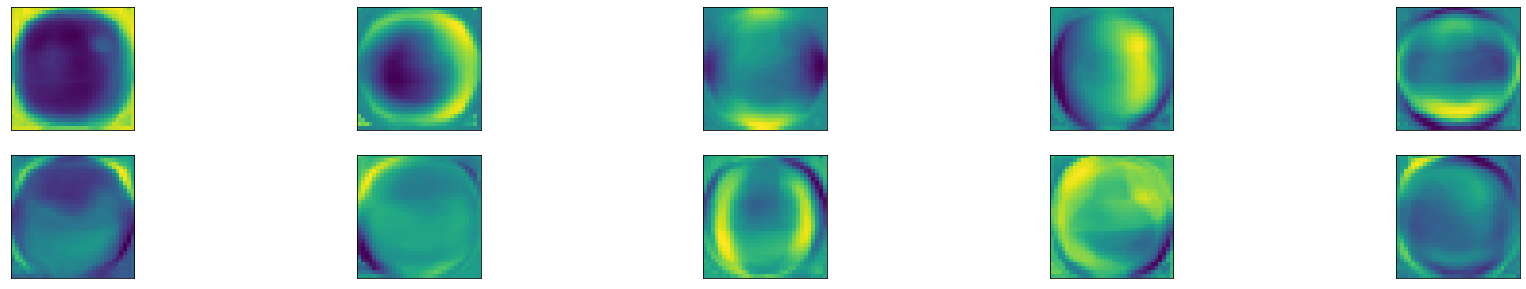

In [28]:
# try to plot some of the eigenvectors, the so called "eigenfruits"
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(b[1][:,i].reshape(32,32)))

## Reduce dimensionality of images with PCA

In [45]:
x_train_flat.shape, x_valid_flat.shape, x_test_flat.shape
#type(x_train_flat_T)

((1024, 29340), (1024, 7853), (1024, 1964))

In [48]:
from sklearn.decomposition import PCA

def PCA_iter(x_all,start, end, step):
    lis =[]
    for i in range(start, end, step):
                print("\n\n===== Component: ",i,"=====\n")
            
                (train,valid, test) = x_all
                pca = PCA(n_components=i)
                print("original shape:   ", train.shape)

                
                pca.fit_transform(train)
                
                train_PCA =  pca.transform(train)
                train_new = pca.inverse_transform(train_PCA)

                valid_PCA =  pca.transform(valid)       
                valid_new = pca.inverse_transform(valid_PCA)
                
                
                test_PCA = pca.transform(test)
                test_new = pca.inverse_transform(test_PCA)

                
                print("transformed shape:", train_PCA.shape)
                print("final shape:", train_new.shape)

                tupla = (x_train_PCA, x_valid_PCA, x_test_PCA) =train_new,valid_new,test_new
                
                lis.append(tupla)
    return lis
        

In [50]:
lis_PCA =  PCA_iter((x_train_flat_T,x_valid_flat_T, x_test_flat_T),10,211,20)



===== Component:  10 =====

original shape:    (29340, 1024)
transformed shape: (29340, 10)
final shape: (29340, 1024)


===== Component:  30 =====

original shape:    (29340, 1024)
transformed shape: (29340, 30)
final shape: (29340, 1024)


===== Component:  50 =====

original shape:    (29340, 1024)
transformed shape: (29340, 50)
final shape: (29340, 1024)


===== Component:  70 =====

original shape:    (29340, 1024)
transformed shape: (29340, 70)
final shape: (29340, 1024)


===== Component:  90 =====

original shape:    (29340, 1024)
transformed shape: (29340, 90)
final shape: (29340, 1024)


===== Component:  110 =====

original shape:    (29340, 1024)
transformed shape: (29340, 110)
final shape: (29340, 1024)


===== Component:  130 =====

original shape:    (29340, 1024)
transformed shape: (29340, 130)
final shape: (29340, 1024)


===== Component:  150 =====

original shape:    (29340, 1024)
transformed shape: (29340, 150)
final shape: (29340, 1024)


===== Component:  170 ==

In [ ]:
x_train_flat_T.shape

In [75]:
y_valid = y_vaild

In [69]:
# with 210 components example of an image
tr,va,te  = lis_PCA[len(lis_PCA)-1] 

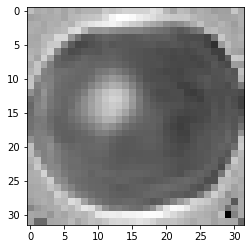

In [70]:
plt.imshow(tr[2,:].reshape(32,32), cmap=plt.get_cmap("gray"))

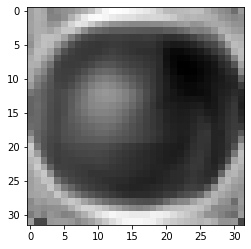

In [71]:
# with 10 components example of the same image
tr,va,te  = lis_PCA[1] 
plt.imshow(tr[2,:].reshape(32,32), cmap=plt.get_cmap("gray"))

## Train feed-forward NN with reduced images

In [253]:
def FW_iter(lis_PCA, ep, bs):
    lis_FW = []
    epochs = ep
    batch_size = bs
    for itr in range(len(lis_PCA)):
        x_train_PCA, x_valid_PCA, x_test_PCA = lis_PCA[itr]
        
       
        print("FW- components: ",(itr+1)*20-10)
        #feed forward neural network
        model = tf.keras.Sequential([
          tf.keras.layers.Input(shape = (1024)),
          tf.keras.layers.Dense(32, activation = "relu"),
          tf.keras.layers.Dense(10, activation='softmax')
          ])
        model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])
        #model.summary()

        history = model.fit(x_train_PCA, y_train,
                        batch_size = bs,
                        epochs = epochs,
                        validation_data=(x_valid_PCA, y_valid),
                        verbose = 2
                      )
        
        y_pred = model.predict(x_test_PCA).round()
        
        zo_loss = zero_one(y_pred,y_test)
        print("Zero-one loss: ",zo_loss)
        tupla = (history, model, zo_loss)
        lis_FW.append(tupla)
    return lis_FW

In [254]:
epochs = 10
batch_size = 32
res = FW_iter(lis_PCA, epochs, batch_size)


FW- components:  10
Train on 29340 samples, validate on 7853 samples
Epoch 1/10
29340/29340 - 4s - loss: 0.9049 - accuracy: 0.6849 - val_loss: 1.1119 - val_accuracy: 0.6659
Epoch 2/10
29340/29340 - 3s - loss: 0.6033 - accuracy: 0.7959 - val_loss: 1.0849 - val_accuracy: 0.6730
Epoch 3/10
29340/29340 - 3s - loss: 0.5062 - accuracy: 0.8271 - val_loss: 1.0579 - val_accuracy: 0.7130
Epoch 4/10
29340/29340 - 3s - loss: 0.4551 - accuracy: 0.8455 - val_loss: 1.0233 - val_accuracy: 0.7266
Epoch 5/10
29340/29340 - 3s - loss: 0.4274 - accuracy: 0.8543 - val_loss: 1.0408 - val_accuracy: 0.7248
Epoch 6/10
29340/29340 - 3s - loss: 0.3995 - accuracy: 0.8649 - val_loss: 1.0381 - val_accuracy: 0.7263
Epoch 7/10
29340/29340 - 3s - loss: 0.3882 - accuracy: 0.8703 - val_loss: 1.1312 - val_accuracy: 0.7260
Epoch 8/10
29340/29340 - 3s - loss: 0.3704 - accuracy: 0.8746 - val_loss: 1.1269 - val_accuracy: 0.7327
Epoch 9/10
29340/29340 - 3s - loss: 0.3571 - accuracy: 0.8808 - val_loss: 1.0407 - val_accuracy: 0.

Epoch 2/10
29340/29340 - 4s - loss: 0.1291 - accuracy: 0.9666 - val_loss: 0.6765 - val_accuracy: 0.8347
Epoch 3/10
29340/29340 - 4s - loss: 0.0736 - accuracy: 0.9806 - val_loss: 0.7491 - val_accuracy: 0.8385
Epoch 4/10
29340/29340 - 3s - loss: 0.0471 - accuracy: 0.9877 - val_loss: 0.7141 - val_accuracy: 0.8509
Epoch 5/10
29340/29340 - 3s - loss: 0.0388 - accuracy: 0.9893 - val_loss: 0.7816 - val_accuracy: 0.8511
Epoch 6/10
29340/29340 - 3s - loss: 0.0312 - accuracy: 0.9918 - val_loss: 0.9463 - val_accuracy: 0.8369
Epoch 7/10
29340/29340 - 3s - loss: 0.0250 - accuracy: 0.9928 - val_loss: 0.8649 - val_accuracy: 0.8589
Epoch 8/10
29340/29340 - 3s - loss: 0.0228 - accuracy: 0.9933 - val_loss: 0.9404 - val_accuracy: 0.8571
Epoch 9/10
29340/29340 - 3s - loss: 0.0196 - accuracy: 0.9943 - val_loss: 0.8630 - val_accuracy: 0.8651
Epoch 10/10
29340/29340 - 3s - loss: 0.0155 - accuracy: 0.9959 - val_loss: 0.9787 - val_accuracy: 0.8576
Zero-one loss:  0.13034623217922606
FW- components:  170
Train 

In [78]:
res[1]

(<tensorflow.python.keras.callbacks.History at 0x2037d24a088>,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x20315834048>)

In [298]:
import numpy as np
import pandas as pd
from plotnine import *

In [299]:

df = pd.DataFrame(
columns = ['epochs', 'valid', 'components', 'accuracy', 'value']
)

for itr in range(len(res)):
  
    time =  [i for i in range(1,epochs+1)]
    valids =  [0 for i in range(1,epochs+1)]
    components = [(itr+1)*20-10 for i in range(1,epochs+1)]
   

    accur = [1 for i in range(1,epochs+1)]
    acc = res[itr][0].history['accuracy']
    
    df1=  pd.DataFrame(data= np.vstack((time,valids,components,accur,acc)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    loss= res[itr][0].history['loss']
    accur = [0 for i in range(1,epochs+1)]
    df2=  pd.DataFrame(data= np.vstack((time,valids,components,accur,loss)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    valids =  [1 for i in range(1,epochs+1)]
    accur = [1 for i in range(1,epochs+1)]
    val_acc = res[itr][0].history['val_accuracy']
    
    df3=  pd.DataFrame(data= np.vstack((time,valids,components,accur,val_acc)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    accur = [0 for i in range(1,epochs+1)]

    val_loss = res[itr][0].history['val_loss']
    df4=  pd.DataFrame(data= np.vstack((time,valids,components,accur,val_loss)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])
   
    df = df.append(df1.append(df2).append(df3).append(df4))
   



In [300]:
from plotnine import *

In [301]:
df['components'] = df['components'].astype('category')

In [302]:
df = df.assign(accuracy = ['accuracy' if accuracy == 1. else 'loss' for accuracy in df['accuracy']])

In [303]:
df = df.assign(valid = ['validation' if valid == 1. else 'training' for valid in df['valid']])

In [304]:
df['accuracy'].unique()

array(['accuracy', 'loss'], dtype=object)

C:\Users\gregs\Anaconda3\envs\tensorflow\lib\site-packages\plotnine\facets\facet.py:552: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
C:\Users\gregs\Anaconda3\envs\tensorflow\lib\site-packages\plotnine\facets\facet.py:558: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


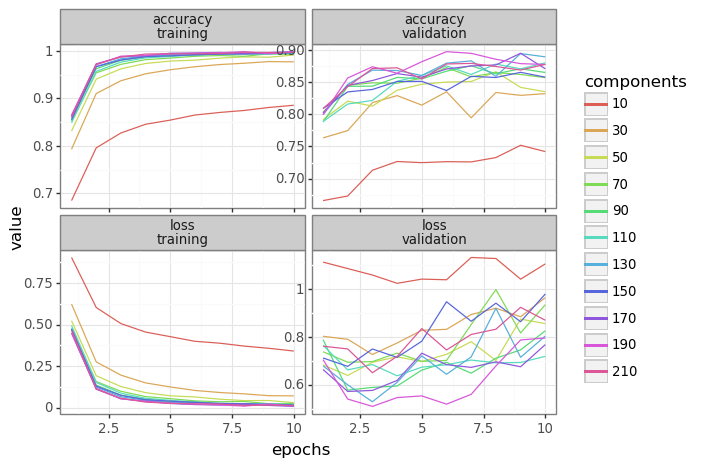

<ggplot: (-9223371898572196904)>

In [305]:
ggplot(df, aes(x='epochs', y='value',color='components')) + \
    geom_line() + \
    facet_wrap(['accuracy','valid'],scales='free') +  theme_bw(base_size=12)

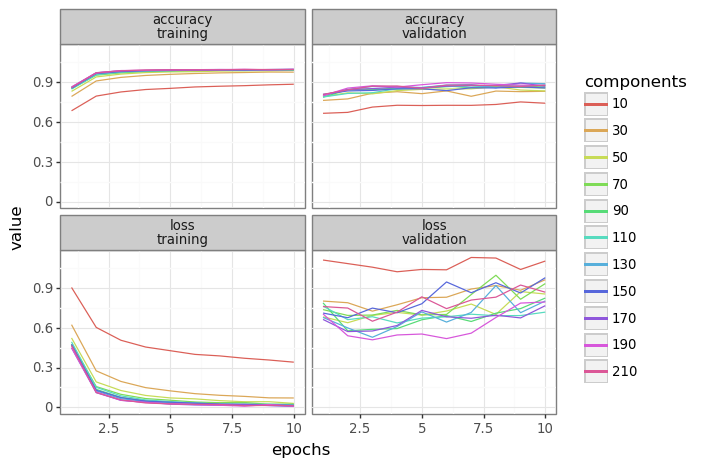

<ggplot: (-9223371898479256548)>

In [306]:
ggplot(df, aes(x='epochs', y='value',color='components')) + \
    geom_line() + \
    facet_wrap(['accuracy','valid']) + \
    theme_bw(base_size=12)

In [ ]:

y_pred = res[0].model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [170]:
ta,va,te = lis_PCA[10]
prediz = res[10][1].predict(te).round(1)

l = zero_one(prediz, y_test)

l[1900]


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [179]:
len(prediz)

1964

In [192]:
def zero_one(y_pred,y_true):
    
    loss = []

    for i in range(len(y_pred)):
        y_hat = np.argmax(y_pred[i])
        y_t = np.argmax(y_test[i])
        if(y_hat[i] == y_t[i]):
            loss.append(0)
        else:
            loss.append(1)
    return loss
        

In [193]:
np.mean(loss)

0.1354378818737271

In [246]:
#prediz = res[10][1].predict(te)
def zero_one(prediz,test):
    y_hat = []
    y_t = []
    for i in range(len(prediz)):
        y_hat.append(np.argmax(prediz[i]))
        y_t.append(np.argmax(test[i]))

   
    loss = []
    for i in range(len(prediz)):
        if(y_hat[i] == y_t[i]):
            loss.append(0)
        else:
            loss.append(1)


    return np.mean(loss)
            

In [252]:
ta,va,te = lis_PCA[10]

y_p = res[10][1].predict(te)
te
zero_one(y_p,y_test)


0.134928716904277

In [249]:
prediz = res[10][1].predict(te)
prediz.shape


(1964, 10)

In [238]:
te.shape

(1964, 1024)

In [228]:
y_hat = []
y_t = []
for i in range(len(prediz)):
    y_hat.append(np.argmax(prediz[i]))
    y_t.append(np.argmax(y_test[i]))


loss = []
for i in range(len(prediz)):
    if(y_hat[i] == y_t[i]):
        loss.append(0)
    else:
        loss.append(1)


In [256]:
res[0][2]

0.2479633401221996

In [257]:
df_loss = pd.DataFrame(
columns = ['components', 'zero_one']
)

losses =[]

for i in range(len(res)):
    losses.append(res[i][2])
components = [i for i in range(10,211,20)]
#df1=  pd.DataFrame(data= np.vstack((time,valids,components,accur,acc)).T,

In [291]:
df_loss = pd.DataFrame( data = [components,losses], index = ['components', 'zero_one']).T


In [292]:
df_loss

,components,zero_one
0,10.0,0.247963
1,30.0,0.155295
2,50.0,0.152749
3,70.0,0.135438
4,90.0,0.129328
5,110.0,0.116599
6,130.0,0.095723
7,150.0,0.130346
8,170.0,0.132892
9,190.0,0.117617


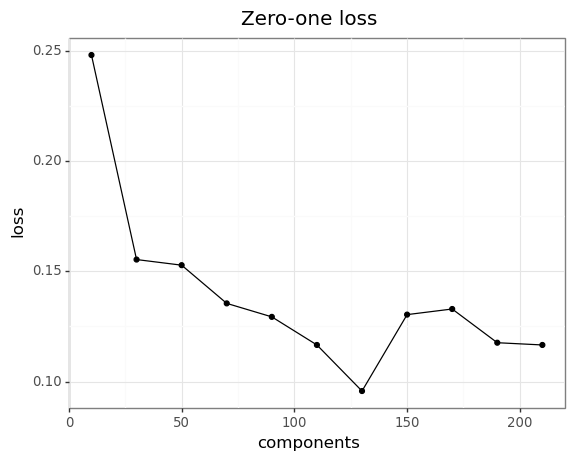

<ggplot: (-9223371898573583336)>

In [297]:
ggplot(df_loss, aes(x='components', y='zero_one')) + \
    geom_line() + \
    geom_point() + \
    theme_bw(base_size=12) + ggtitle("Zero-one loss") + ylab("loss")